<a href="https://colab.research.google.com/github/RiteshopShrivastava/K_Nearest_Neighbors/blob/main/Assignment_KNN_Glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prepare a model for glass classification using KNN**

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)

1 -- building_windows_float_processed

2 --building_windows_non_float_processed

3 --vehicle_windows_float_processed

4 --vehicle_windows_non_float_processed (none in this database)

5 --containers

6 --tableware

7 --headlamps

In [12]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [45]:
glass_df = pd.read_csv('glass.csv')

In [46]:
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [47]:
array = glass_df.values

In [48]:
x= array[:,0:9]
y= array[:,9:]

In [49]:
x

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [ ]:
y

In [82]:
kfold = KFold(n_splits=25)
classifier = KNeighborsClassifier(n_neighbors= 5)
results = cross_val_score(classifier, x, y.ravel(), cv=kfold)
print(results.mean())

0.5666666666666667


**When number of neighbors =5 then the accuracy =57 %**


# **Grid Search for Algorithm Tuning**

In [35]:
array = glass_df.values
x= array[:,0:9]
y= array[:,9:]

In [83]:
import numpy as np
n_neighbors = np.array(range(1,50))
param_grid = dict(n_neighbors=n_neighbors)

In [84]:
model= KNeighborsClassifier()
grid= GridSearchCV( estimator=model, param_grid=param_grid)
grid.fit(x,y.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [85]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


**Optimum number of neighbors =1**

**Best accuracy= 64 %**

# **Visualizing the CV results**

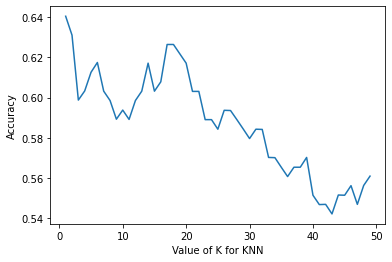

In [109]:
import matplotlib.pyplot as plt
k_range = range(1, 50)
k_scores =[]
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x, y.ravel(), cv=5)
  k_scores.append(scores.mean())
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.show()